In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
folder='train'
classes=['open_eyes','closed_eyes']


In [3]:
train_data=[]

for i in classes:
    path=os.path.join(folder,i)
    class_num= classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        rgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(rgb,(224,224))
        train_data.append([new_array,class_num])

In [4]:
import random

random.shuffle(train_data)

In [5]:
x=[]
y=[]

for i,j in train_data:
    x.append(i)
    y.append(j)

x= np.array(x).reshape(-1,224,224,3)
x.shape

(4000, 224, 224, 3)

In [6]:
x=x/255.0
y=np.array(y)

In [7]:
import pickle

pickle_out= open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [8]:
#pickle_in = open('x.pickle','rb')
#x = pickle.load(pickle_in)

#pickle_in = open('y.pickle','rb')
#y= pickle.load(pickle_in)

In [9]:
model= tf.keras.applications.mobilenet.MobileNet()

2023-07-21 04:39:04.499945: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-21 04:39:04.501033: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-07-21 04:39:04.501037: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-07-21 04:39:04.501644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-21 04:39:04.501672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [11]:
base_input= model.layers[0].input

In [12]:
base_output=model.layers[-4].output

In [13]:
flat_layer= layers.Flatten()(base_output)
final_output= layers.Dense(1)(flat_layer)
final_op = layers.Activation('sigmoid')(final_output)

In [14]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [15]:
new_model.compile(loss= 'binary_crossentropy' , optimizer= 'adam', metrics= ['accuracy'])

In [16]:
new_model.fit(x,y,epochs=40, validation_split=0.1)

Epoch 1/40


2023-07-21 04:40:03.690903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - ETA: 0s - loss: 1.6099 - accuracy: 0.8919

2023-07-21 04:40:49.089097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 49s 407ms/step - loss: 1.6099 - accuracy: 0.8919 - val_loss: 0.4614 - val_accuracy: 0.9700
Epoch 2/40
113/113 [==============================] - 44s 390ms/step - loss: 0.1978 - accuracy: 0.9867 - val_loss: 0.3085 - val_accuracy: 0.9800
Epoch 3/40
113/113 [==============================] - 44s 390ms/step - loss: 0.2495 - accuracy: 0.9825 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/40
113/113 [==============================] - 44s 390ms/step - loss: 0.2474 - accuracy: 0.9831 - val_loss: 0.4614 - val_accuracy: 0.9700
Epoch 5/40
113/113 [==============================] - 47s 416ms/step - loss: 0.3048 - accuracy: 0.9800 - val_loss: 0.5013 - val_accuracy: 0.9675
Epoch 6/40
113/113 [==============================] - 48s 423ms/step - loss: 0.0173 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/40
113/113 [==============================] - 46s 407ms/step - loss: 0.0131 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_a

In [17]:
new_model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [18]:
new_model= tf.keras.models.load_model('my_model')

In [19]:
img = cv2.imread('test/closed_test_1.png', cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb, (224,224))

In [20]:
x_input = np.array(new).reshape(1,224,224,3)


In [21]:
x_input.shape

(1, 224, 224, 3)

In [22]:
x_input=x_input/255.0

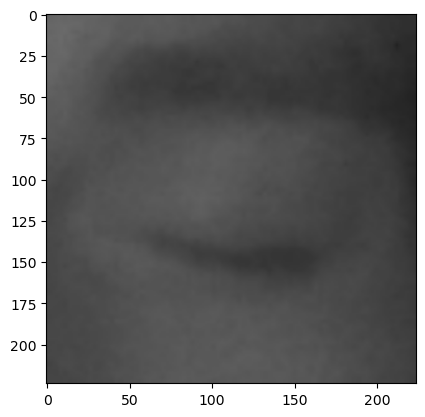

In [23]:
plt.imshow(new)

In [24]:
prediction= new_model.predict(x_input)

2023-07-21 05:12:48.498521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 389ms/step


In [25]:
prediction

array([[3.6828918]], dtype=float32)

In [26]:
#prediction value for open eye is negative and open eye will be positive

img = cv2.imread('test/open-test_1.png', cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb, (224,224))

In [27]:
x_input = np.array(new).reshape(1,224,224,3)

In [28]:
x_input.shape

(1, 224, 224, 3)

In [29]:
x_input=x_input/255.0

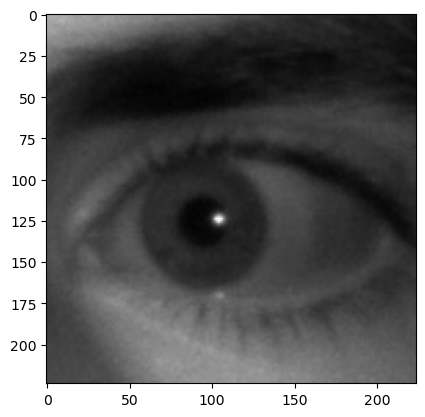

In [30]:
plt.imshow(new)

In [31]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 0s 22ms/step


In [32]:
prediction #negative for open eye

array([[-88.97449]], dtype=float32)

In [33]:
img= cv2.imread('test/full_face.jpg')

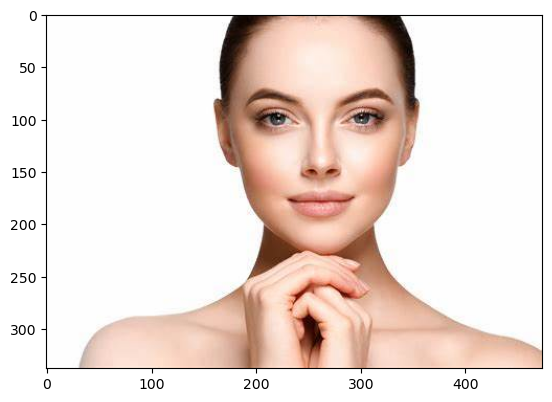

In [34]:
plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [35]:
face_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [37]:
eyes= eye_cascade.detectMultiScale(gray,1.1,4)

In [38]:
for x,y,w,h in eyes[:2]:
    cv2.rectangle(img, (x,y) ,(x+w, y+h), (0,255,0), 2)

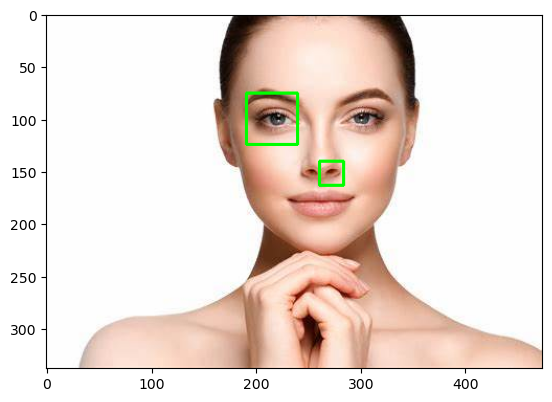

In [39]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [40]:
#cropping the eyes
gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
eyes= eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes[:2]:
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi =roi_color[ey:ey+eh,ex:ex+ew]
        

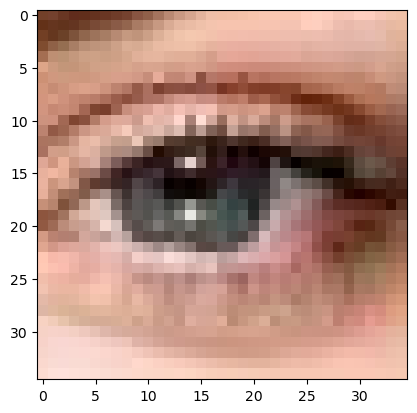

In [41]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))


In [42]:
final_image= cv2.resize(eyes_roi, (224,24))
final_image= np.expand_dims(final_image, axis=0)
final_image= final_image/255.0

In [43]:
final_image.shape

(1, 24, 224, 3)

In [44]:
prediction= new_model.predict(final_image)

2023-07-21 05:12:49.584477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 340ms/step


In [45]:
prediction

array([[0.00496055]], dtype=float32)

In [72]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError('cannot open webcam')

In [76]:
#read the camera frame
while True:
    cbs = 0
        # read the camera frame
    success, frame = cap.read()
    if not success:
        break
    else:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        faces = face_cascade.detectMultiScale(frame, 1.1, 7)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Draw rectangle around each face
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
            if len(eyes) == 0:
                print('Eyes not detected')
                cbs = 0
                break

            for (ex, ey, ew, eh) in eyes:
                cbs = 1
                cv2.rectangle(roi_color, (ex, ey),
                                  (ex+ew, ey+eh), (0, 255, 0), 2)
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    if cbs == 1:
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image/255.0

        predictions = new_model.predict(final_image)
        if (predictions[0][0] < 0.3):
            status = "Open Eyes"
        else:
            status = "Closed Eyes"

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, status, (50, 50), font,
                        3, (0, 0, 255), 2, cv2.LINE_4)
    
    cv2.imshow('Driver Drowsiness detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
